<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Рандомный-лес" data-toc-modified-id="Рандомный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Рандомный лес</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Итог-блока" data-toc-modified-id="Итог-блока-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итог блока</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Сравнение-с-константной-моделью" data-toc-modified-id="Сравнение-с-константной-моделью-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Сравнение с константной моделью</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Я решил использовать алгоритм классификации рандомного леса и логистическую регрессию

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score, 
    mean_squared_error, 
    roc_auc_score,
    roc_curve,
    recall_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

rs = 12345
sep = '-------------------------------------------------'

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
pd.options.mode.chained_assignment = None 

print('Кол-во тех у кого есть признак "Кол-во лет и ушел:',data[(data['Tenure'].isna()) & (data['Exited'] == 1)].shape[0])
print('Кол-во тех у кого есть признак "Кол-во лет и остался:',data[(data['Tenure'].isna()) & (data['Exited'] == 0)].shape[0])

data = data.dropna()
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1,)
data_ohe = pd.get_dummies(data, drop_first=True)

features = data_ohe.drop(['Exited'], axis=1)
target = data['Exited']

numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure']

features, features_test, target, target_test = train_test_split(features, target, test_size=.10, random_state=rs)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=rs)

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features.head())

Кол-во тех у кого есть признак "Кол-во лет и ушел: 183
Кол-во тех у кого есть признак "Кол-во лет и остался: 726


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4189,598,32,4.0,111156.52,1,1,1,167376.26,0,0,0
9095,850,38,2.0,102741.15,2,0,1,23974.85,1,0,0
1987,738,54,4.0,0.00,1,0,1,55725.04,0,0,1
8996,615,32,5.0,138521.83,1,1,1,56897.10,0,1,1
3756,755,31,5.0,0.00,2,0,1,194660.78,0,0,1


Вывод:

В целом данные все на месте, за исключением того сколько лет человек является клиентом банка, скорее всего в базу записывается не число и надо об этом сообщить разработчикам, но сейчас я думаю удалить эти строки, так как меня смущает, что клиентов которые являются клиентами банка существенно больше, чем у тех кто ушел. В целом это 9% выборки, и мне кажется ~ 9000 строк хватит для обучения, но посмотрим на основе auc_roc и f1 метрик.  

Также я решил удалить категориальные дискретные переменные по типу RowNumber, CustomerId, Surname так как считаю, что эти признаки никак не помогут нам в обучении модели. 

Разделил выборку на тестовую и валидационную

## Исследование задачи

### Случайный лес

In [3]:
%%time

best_model = None
best_score = 0
best_depth = None
best_n_est = 0

for est in range(10, 51, 10):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        score = f1_score(target_valid, predictions_valid)
        if score > best_score:
            best_score = score
            best_model = model
            best_depth = depth
            best_n_est = est            

CPU times: user 2.38 s, sys: 36.4 ms, total: 2.42 s
Wall time: 2.43 s


In [4]:
def get_score_f1_auc_score(features, target, name = 'Передайте название', model = None):
    predict = model.predict(features) if model != None else best_model.predict(features)
    ar_score = roc_auc_score(target, model.predict_proba(features)[:, 1])
    f1 = f1_score(target, predict)
    print(name) 
    print(f'Метрика F1: {f1}')
    print(f'ROC AUC: {ar_score}')
    print(sep)

get_score_f1_auc_score(features_train, target_train, 'Обучающая выборка', best_model)
get_score_f1_auc_score(features_valid, target_valid, 'Валидационная выборка', best_model)

Обучающая выборка
Метрика F1: 0.5103211009174311
ROC AUC: 0.8609589175716386
-------------------------------------------------
Валидационная выборка
Метрика F1: 0.5086887835703002
ROC AUC: 0.8394004960016196
-------------------------------------------------


Модель обучили, что можно сказать подобрали гиперпараметры, модель оказалась переобученной, но в целом метрики показали следующие результаты

f1_score = 0.58
auc_roc= 0.72

Не хватило 0.01, будем работать) Посмотрим показатель на логистической регрессии.

### Логистическая регрессия

In [5]:
%%time
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)

get_score_f1_auc_score(features_train, target_train, 'Логистическая регрессия - Обучающая выборка', model)
get_score_f1_auc_score(features_valid, target_valid, 'Логистическая регрессия - Валидационная выборка', model)

Логистическая регрессия - Обучающая выборка
Метрика F1: 0.2914634146341463
ROC AUC: 0.7688070295481809
-------------------------------------------------
Логистическая регрессия - Валидационная выборка
Метрика F1: 0.3222591362126246
ROC AUC: 0.7621357312368549
-------------------------------------------------
CPU times: user 35.9 ms, sys: 138 ms, total: 174 ms
Wall time: 108 ms


Вывод:

Что-то на логистической регрессиии у нас совсем плохие показатели, как на обучающей выборке, так и на валидационной, но модель показывает примерно одни результаты

## Борьба с дисбалансом

### Взвешивание классов

In [6]:
%%time

best_model = None
best_score = 0
best_depth = None
best_n_est = 0

for est in range(10, 51, 10):
    for depth in range(1, 6):
        model = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        score = f1_score(target_valid, predictions_valid)
        if score > best_score:
            best_score = score
            best_model = model
            best_depth = depth
            best_n_est = est     

get_score_f1_auc_score(features_train, target_train, 'Рандомный лес - Обучающая выборка', best_model)
get_score_f1_auc_score(features_valid, target_valid, 'Рандомный лес - Валидационая выборка', best_model)
print('Модель - ', best_model)
print(sep) 

Рандомный лес - Обучающая выборка
Метрика F1: 0.5885596140592694
ROC AUC: 0.8470886052335183
-------------------------------------------------
Рандомный лес - Валидационая выборка
Метрика F1: 0.5875370919881305
ROC AUC: 0.8203414088245549
-------------------------------------------------
Модель -  RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=10,
                       random_state=12345)
-------------------------------------------------
CPU times: user 2.5 s, sys: 54.8 ms, total: 2.55 s
Wall time: 2.61 s


Мы немного увеличили показатели метрик, посмотрим как проявит себя логистическая регрессия

In [7]:
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=rs)
lr_model.fit(features_train, target_train)

get_score_f1_auc_score(features_train, target_train, 'Логистическая регрессия - Обучающая выборка', lr_model)
get_score_f1_auc_score(features_valid, target_valid, 'Логистическая регрессия - Валидационая выборка', lr_model)

Логистическая регрессия - Обучающая выборка
Метрика F1: 0.49421296296296297
ROC AUC: 0.7726426731844404
-------------------------------------------------
Логистическая регрессия - Валидационая выборка
Метрика F1: 0.5081699346405228
ROC AUC: 0.7638242174759027
-------------------------------------------------


Ух! Обученная модель логистической регрессии с включенным балансом классов показала рост в метриках, посмотрим что будет после увеличения и уменьшения выборок, но опять немного недообучилась.

### Увеличение выборки

In [8]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

4


#### Логистическая регрессия

In [9]:
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=rs)
lr_model.fit(features_upsampled, target_upsampled)

get_score_f1_auc_score(features_train, target_train, 'Логистическая регрессия - Обучающая выборка', lr_model)
get_score_f1_auc_score(features_valid, target_valid, 'Логистическая регрессия - Валидационая выборка', lr_model)

Логистическая регрессия - Обучающая выборка
Метрика F1: 0.49421296296296297
ROC AUC: 0.7726280155224641
-------------------------------------------------
Логистическая регрессия - Валидационая выборка
Метрика F1: 0.5081699346405228
ROC AUC: 0.7638185938747737
-------------------------------------------------


На логистической регрессии, мы совсем совсем немного увеличили метрики на валидационной выборке, но не хватает 0.08 для того чтобы преодолеть нормативный порог

#### Рандомный лес

In [10]:

best_model_us = None
best_score = 0
best_depth = None
best_n_est = 0

for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        score = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
        if score > best_score:
            best_score = score
            best_model_us = model
            best_depth = depth
            best_n_est = est     

get_score_f1_auc_score(features_train, target_train, 'Рандомный лес - Обучающая выборка', best_model_us)
get_score_f1_auc_score(features_valid, target_valid, 'Рандомный лес - Валидационая выборка', best_model_us)
print('Модель - ', best_model)
print(sep) 


Рандомный лес - Обучающая выборка
Метрика F1: 0.7397163120567377
ROC AUC: 0.9509572952349608
-------------------------------------------------
Рандомный лес - Валидационая выборка
Метрика F1: 0.6044176706827309
ROC AUC: 0.8592342342342343
-------------------------------------------------
Модель -  RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=10,
                       random_state=12345)
-------------------------------------------------


А вот рандомный лес напротив показал хорошие результаты мы увеличили показатели до рекомендуемых и AUC_ROC также на высоком уровне

### Уменьшение выборки

In [11]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [12]:
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=rs)
lr_model.fit(features_downsampled, target_downsampled)

get_score_f1_auc_score(features_train, target_train, 'Логистическая регрессия - Обучающая выборка', lr_model)
get_score_f1_auc_score(features_valid, target_valid, 'Логистическая регрессия - Валидационая выборка', lr_model)

Логистическая регрессия - Обучающая выборка
Метрика F1: 0.49244186046511634
ROC AUC: 0.7725332404126398
-------------------------------------------------
Логистическая регрессия - Валидационая выборка
Метрика F1: 0.5065789473684209
ROC AUC: 0.763848117780702
-------------------------------------------------


На логистической регрессии модель в целом себя почему-то показывает плохо, даже при применении upsample и downsample

In [13]:
best_model_ds = None
best_score = 0
best_depth = None
best_n_est = 0

for est in range(10, 100, 5):
    for depth in range(1, 10):
        model = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        score = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
        if score > best_score:
            best_score = score
            best_model_ds = model
            best_depth = depth
            best_n_est = est     

get_score_f1_auc_score(features_train, target_train, 'Рандомный лес - Обучающая выборка', best_model_ds)
get_score_f1_auc_score(features_valid, target_valid, 'Рандомный лес - Валидационая выборка', best_model_ds)
print('Модель - ', best_model_ds)
print(sep) 

Рандомный лес - Обучающая выборка
Метрика F1: 0.68324184694866
ROC AUC: 0.9315412231752294
-------------------------------------------------
Рандомный лес - Валидационая выборка
Метрика F1: 0.5961713764813127
ROC AUC: 0.8543163950467322
-------------------------------------------------
Модель -  RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=95,
                       random_state=12345)
-------------------------------------------------


### Итог блока

Лучшая модель оказалась с подобранными гиперпарметрами

class_weight='balanced', max_depth=9, n_estimators=90 и обученную на увеличенной выборке!

In [14]:
best_model_ds

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=95,
                       random_state=12345)

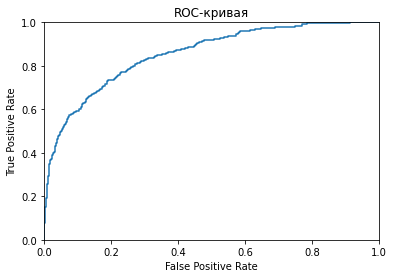

Рандомный лес - Тестовая выборка
Метрика F1: 0.6044176706827309
ROC AUC: 0.8592342342342343
-------------------------------------------------
RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=10,
                       random_state=12345)


In [15]:
def draw_roc_auc(features, target, best_model):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
    
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('ROC-кривая')
    plt.show()
    
draw_roc_auc(features_valid, target_valid, best_model_us)
get_score_f1_auc_score(features_valid, target_valid, 'Рандомный лес - Тестовая выборка', best_model_us)
print(best_model)

Лучшая модель дает показатель f1_score = 0.60, обучена на увеличенной выборке

## Тестирование модели

In [29]:
get_score_f1_auc_score(features_test, target_test, 'Рандомный лес - Тестовая выборка', best_model)

print(best_model)

Рандомный лес - Тестовая выборка
Метрика F1: 0.6026785714285715
ROC AUC: 0.8325610007661933
-------------------------------------------------
RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=10,
                       random_state=12345)


### Вывод

На тестовой выборке мне также удалось добиться показателя AUC_ROC = 0.83, а метрики F1-score 0.60, что соответует задаче, единственное, что я могу еще придумать оценку модели на адекватность, чтобы создать псевдовыборку и на ней проверить и какие показатели будет мне выдавать модель тогда.

По итогу была выбрана модель "рандомный лес" со следующими параметрами

class_weight='balanced', max_depth=9, n_estimators=90 и обученную на увеличенной выборке!

In [27]:
features_columns = features.columns
test_features = {}

for column in features_columns:
    test_features[column] = []
    for i in range(100):
        test_features[column].append(random.randint (0,100))

test_features = pd.DataFrame(data=test_features)

test_features[numeric] = scaler.transform(test_features[numeric])
test_target = []

for i in range(0, 100):
    test_target.append(random.randint(0, 1))
test_target = pd.Series(test_target)

get_score_f1_auc_score(test_features, test_target, 'Рандомный лес - Тестовая выборка', best_model)

Рандомный лес - Тестовая выборка
Метрика F1: 0.6197183098591549
ROC AUC: 0.4454139610389611
-------------------------------------------------


Забавно, но на псевдоданных, модель выдает тоже достаточно высокую оценку f1 метрику, но низкую AUC_ROC из чего я могу сделать вывод, что все таки модель правильно предсказывает. 

#### Сравнение с константной моделью

In [32]:
constant_model = pd.Series(1, index=target_test.index)
constant_f1 = f1_score(target_test, constant_model)
model_f1 = f1_score(target_test, best_model.predict(features_test))

print(f'Метрика F1 для константной модели {constant_f1}')
print(f'Метрика F1 для лучшей и обученной модели {model_f1}')

print(f'Разница в оценке {abs(model_f1 - constant_f1)}')


Метрика F1 для константной модели 0.3424408014571949
Метрика F1 для лучшей и обученной модели 0.6026785714285715
Разница в оценке 0.2602377699713766


f1 метрика константной модели 0.34, а обученной на тестовой выборке 0.60 из чего я могу сделать вывод, что модель справляется со своей задачей

In [36]:
test_recall = recall_score(target_test, best_model.predict(features_test))
test_recall

0.7180851063829787

Доля истинно положительных предсказаний из всех 73%, т.е в 73% модель верно предсказала что клиенты будут уходить из банка и эту информацию можно в атоматическом режиме передавать менеджерам банка. 